In [195]:
!pip install scikit-learn==1.6.0

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [197]:
df = pd.read_csv("/Users/anusrutamohanty/Desktop/Sleep_health_and_lifestyle_dataset.csv")

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [199]:
unique_values = df['Gender'].unique()
print(unique_values)

['Male' 'Female']


In [200]:
unique_values = df['Occupation'].unique()
print(unique_values)

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [201]:
unique_values = df['BMI Category'].unique()
print(unique_values)

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [202]:
unique_values = df['Sleep Disorder'].unique()
print(unique_values)

[nan 'Sleep Apnea' 'Insomnia']


In [203]:
#bp is in form systolic/dystolic

if 'Blood Pressure' in df.columns:
    try:
        bp_split = df['Blood Pressure'].astype(str).str.split('/', expand=True)
        if bp_split.shape[1] == 2:
            df['BP_Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
            df['BP_Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
            df.drop(columns=['Blood Pressure'], inplace=True)
    except Exception as e:
        print('Could not parse Blood Pressure column:', e)

In [204]:
df['Healthy Lifestyle'] = np.where(
(df['Sleep Duration'] >= 6.5) &
(df['Quality of Sleep'] >= 6) &
(df['Stress Level'] <= 5) &
(df['Physical Activity Level'] >= 50) &
(df['BMI Category'] == 'Normal'),
1, 0
)

In [205]:
unique_values = df['Healthy Lifestyle'].unique()
print(unique_values)

[0 1]


In [206]:
print('Healthy Lifestyle distribution:')
print(df['Healthy Lifestyle'].value_counts(normalize=False))

Healthy Lifestyle distribution:
Healthy Lifestyle
0    278
1     96
Name: count, dtype: int64


In [207]:
label_encoders = {}
cat_cols = [c for c in ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'] if c in df.columns]
for col in cat_cols:
    le = LabelEncoder()  # This line and the following lines need to be indented
    df[col] = df[col].fillna('Unknown')
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [208]:
df.drop('Person ID', axis=1, inplace=True)
df.drop('Quality of Sleep', axis=1, inplace=True)
df.drop('Stress Level', axis=1, inplace=True)

In [209]:
x = df[['Age','Occupation','Sleep Duration','BMI Category','Sleep Disorder']]
y = df['Healthy Lifestyle']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.5, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test set: {:.4f}'.format(acc))
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Accuracy on test set: 1.0000

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        48

    accuracy                           1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187

Confusion matrix:
 [[139   0]
 [  0  48]]


In [210]:
df.head(20)

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_Systolic,BP_Diastolic,Healthy Lifestyle
0,1,27,9,6.1,42,3,77,4200,2,126,83,0
1,1,28,1,6.2,60,0,75,10000,2,125,80,0
2,1,28,1,6.2,60,0,75,10000,2,125,80,0
3,1,28,6,5.9,30,2,85,3000,1,140,90,0
4,1,28,6,5.9,30,2,85,3000,1,140,90,0
5,1,28,9,5.9,30,2,85,3000,0,140,90,0
6,1,29,10,6.3,40,2,82,3500,0,140,90,0
7,1,29,1,7.8,75,0,70,8000,2,120,80,0
8,1,29,1,7.8,75,0,70,8000,2,120,80,0
9,1,29,1,7.8,75,0,70,8000,2,120,80,0


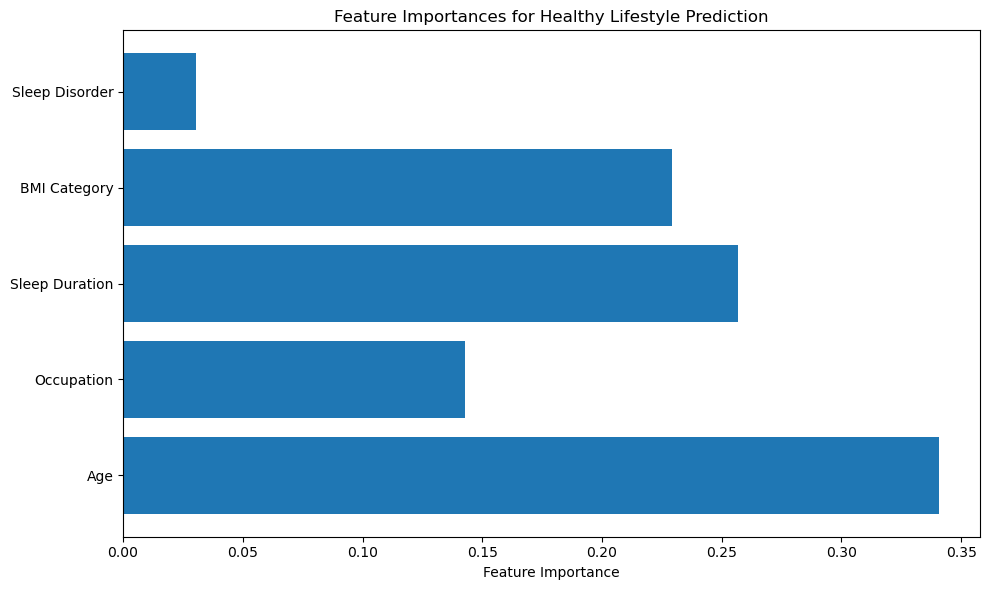

In [211]:
try:
    importances = model.feature_importances_
    feature_names = x.columns
    # If scaling changed ordering, still the same columns map to model input
    plt.figure(figsize=(10,6))
    plt.barh(feature_names, importances)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importances for Healthy Lifestyle Prediction')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Could not plot feature importances:', e)

In [212]:
import joblib

model_path = '/Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS/model.pkl' 
scaler_path = '/Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS/scaler.pkl' 
encoders_path = '/Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS/encoders.pkl'  

import os
os.makedirs('/Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS', exist_ok=True)

joblib.dump(model, model_path)
joblib.dump(scaler, scaler_path)
joblib.dump(label_encoders, encoders_path)

['/Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS/encoders.pkl']

In [213]:
pip install onnxruntime onnxruntime-tools numpy

Note: you may need to restart the kernel to use updated packages.


In [214]:
pip install skl2onnx onnxmltools lightgbm scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [215]:
import joblib
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import (
    FloatTensorType, Int64TensorType, StringTensorType
)

In [216]:
joblib.dump(model, "/Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS/schedule_recommender_lgb.joblib")
print("Saved model -> /Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS/schedule_recommender_lgb.joblib")

Saved model -> /Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS/schedule_recommender_lgb.joblib


In [218]:
import joblib

model = joblib.load("/Users/anusrutamohanty/Desktop/LIFY. ML MODEL FOR ANALYSIS/model.pkl")
n_features = 5
initial_type = [('float_input', FloatTensorType([None, n_features]))]
onx = convert_sklearn(model, initial_types=initial_type)
with open("model.onnx", "wb") as f:
    f.write(onx.SerializeToString())
